In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

data = pd.read_excel("C:/Users/Usuario/Documents/Projectes/ChallengeAuditoria/challenge-auditoria/data/inventory_data_month.xlsx")

ts = ['Jan_2022', "Feb_2022", "Mar_2022", "Apr_2022", "May_2022", "Jun_2022", "Jul_2022", "Aug_2022", "Sep_2022", "Oct_2022", "Nov_2022", "Dec_2022", 'Jan_2023', "Feb_2023", "Mar_2023", "Apr_2023", "May_2023", "Jun_2023", "Jul_2023", "Aug_2023", "Sep_2023", "Oct_2023", "Nov_2023", "Dec_2023"]

dataori = data
data = data[ts]
# Assuming each row represents a time step and each column represents a month
# Transpose the data for better handling



In [2]:
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return X, y

In [3]:
X = []
y = []
for e in data.values:
    X_e, y_e = create_sequences(e, 12)
    X.extend(X_e)
    y.extend(y_e)

X = np.array(X)
y = np.array(y)

In [4]:
y.shape

(4596,)

In [5]:

model = Sequential()
model.add(LSTM(500, activation='relu', input_shape=(12, 1)))
model.add(Dense(1))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='mse')  # Mean Squared Error loss for regression problems

# Train the model
model.fit(X, y, epochs=100, verbose=1)

c:\Users\Usuario\Documents\Projectes\ChallengeAuditoria\challenge-auditoria\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 1114889344.0000
Epoch 2/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 665642432.0000
Epoch 3/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 756940608.0000
Epoch 4/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 982584960.0000
Epoch 5/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 676859200.0000
Epoch 6/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 6259938816.0000
Epoch 7/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 1248801024.0000
Epoch 8/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 738705472.0000
Epoch 9/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 841754176.0000
Epoch 10/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 800807104.0000
Epoch 11/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 1095889152.0000
Epoch 12/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 1053582784.0000
Epoch 13/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 11065

In [ ]:
print("Shape of X (input data for LSTM):", X.shape)


Shape of X (input data for LSTM): (4596, 12)


In [7]:
X_f = []
y = []
for e in data.values:
    X_e = [e[12:]]
    X_f.extend(X_e)

X_f = np.array(X_f)

In [8]:
X_f[0]

array([2009.81091256, 8559.05396715, 5625.91565061, 9318.92507952,
       2267.55036046, 4209.05404438, 5006.27960701, 3997.34860344,
       7275.07348711, 2393.86068317, 3573.06570548, 4715.9318991 ])

In [9]:
X[0]

array([ 4876.44301115,  3179.71181936,  4631.577241  ,     0.        ,
           0.        ,  9650.94622414, 17052.80394671,  3102.5740491 ,
        1386.23115819,  3532.45382059, 10290.28874853,  7437.97582724])

In [10]:
X[0]

array([ 4876.44301115,  3179.71181936,  4631.577241  ,     0.        ,
           0.        ,  9650.94622414, 17052.80394671,  3102.5740491 ,
        1386.23115819,  3532.45382059, 10290.28874853,  7437.97582724])

In [11]:
model.predict( X[0].reshape(1,12))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


array([[4275.466]], dtype=float32)

In [12]:
forecasts = {}
for i,product in enumerate(dataori["material"]):
    predictions = []
    llista = list(X_f[i])
    for _ in range(12):
        llista.extend(predictions)
        topredict = np.array(llista[-12:]).reshape(1,12)
        next_month_prediction = model.predict(topredict, verbose=False)
        predictions.append(next_month_prediction[0][0])
        
    forecasts[product] = predictions
    print(product)

114230822
115030252
115070602
115130209
115170581
116211401
116490250
116490259
118030902
118030904
118130103
133062220
133062421
133065201
133065207
133065216
133065270
133065271
133066003
133066421
133066424
133066428
133066431
133066450
133066451
133066452
133066461
133066531
133066532
133066550
133066701
133067502
133067532
133068500
133068501
133100502
133121045
133160110
133200405
134055103
134059411
134060101
134060502
134060503
134140101
134320133
134320136
134321006
135030110
135030111
135030114
135030117
135030207
135030210
135060113
135060909
135060910
135061014
135061015
135061019
135062142
135062150
135292152
135292168
135292178
135292430
135320109
135320132
135320423
135320904
135320905
135320906
135321602
135321603
135325102
135900206
136130101
136130102
136170112
136170115
136170121
136170151
136170152
136170153
136170154
136170157
136170180
136170182
136170183
136170185
136170186
136170225
136170243
136170330
136170331
136170332
136170334
136170345
136175002
136176037


In [13]:
print(min(forecasts.values()))

[34.718964, 37.979862, 33.58948, 38.99865, 23.11988, 23.02255, 22.043793, 20.69343, 19.778362, 17.624191, 17.034546, 17.031471]


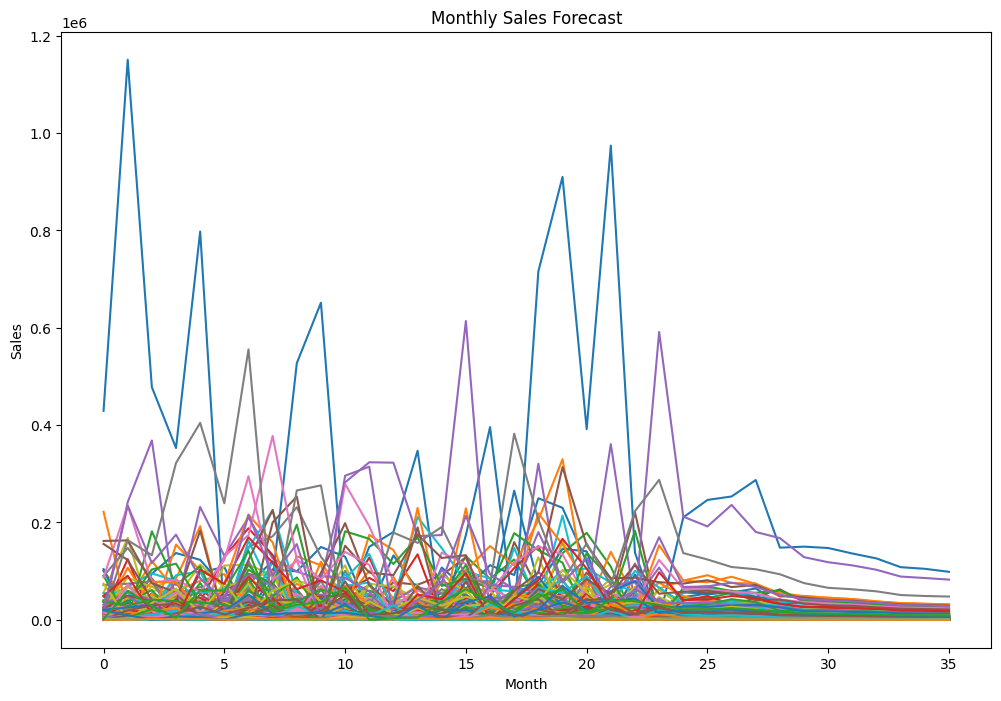

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
for product, forecast in forecasts.items():
    previous = list(dataori[dataori["material"] == product][ts].values[0])
    forecast = [f if f > -1000000 else -1000000 for f in forecast]
    plt.plot(np.arange(0, 36), previous + forecast, label=product)
plt.title('Monthly Sales Forecast')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

In [19]:
import json
new_forecasts = {key: list([str(f) if f > -10000 else str(-10000) for f in value]) for key, value in forecasts.items()}
# Saving the dictionary to a JSON file
with open("../forecast/lstm.json", "w") as json_file:
    json.dump(new_forecasts, json_file)
